In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from numpy import argmax
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_train = pd.read_csv('/content/Training.csv')
df_train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [ ]:
df_test = pd.read_csv('/content/Testing.csv')
df_test.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check column that has missing column
print("Column that has null values in training")
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])



Column that has null values in training
Unnamed: 133    4920
dtype: int64


In [ ]:
# Check column that has missing column
print("Column that has null values in testing")
print(df_test.isnull().sum()[df_train.isnull().sum() > 0])



Column that has null values in testing
Series([], dtype: int64)


In [ ]:
df_train = df_train.drop(["Unnamed: 133"],axis = 1)

In [ ]:
print("Number of Diagnosis in Training:",len(set(df_train['prognosis'].tolist())))
print("Number of Diagnosis in Training:",len(set(df_test['prognosis'].tolist())))

Number of Diagnosis in Training: 41
Number of Diagnosis in Training: 41


In [ ]:
le = LabelEncoder()

In [ ]:
df_train.prognosis = le.fit_transform(df_train.prognosis)
df_test.prognosis = le.fit_transform(df_test.prognosis)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Separate features and target
X_train =  df_train.drop(["prognosis"],axis=1)  # Replace "target" with your actual target column name
y_train = df_train["prognosis"]

# Compute mutual information scores
mi_scores = mutual_info_classif(X_train, y_train, discrete_features="auto", random_state=42)

# Create a DataFrame to store MI scores
mi_df = pd.DataFrame({"Feature": X_train.columns, "MI_Score": mi_scores})

# Select the top 15 features
top_15_features = mi_df.sort_values(by="MI_Score", ascending=False).head(15)

# Display top 15 features
print(top_15_features)

# Keep only the top 15 features in the dataset
df_train_selected = df_train[top_15_features["Feature"].tolist() + ["prognosis"]]
df_train_selected


              Feature  MI_Score
14            fatigue  0.575774
11           vomiting  0.571960
25         high_fever  0.527553
35   loss_of_appetite  0.514968
34             nausea  0.492801
39     abdominal_pain  0.471031
31           headache  0.470458
32     yellowish_skin  0.437521
43  yellowing_of_eyes  0.434805
1           skin_rash  0.414841
5              chills  0.413239
48            malaise  0.412750
6          joint_pain  0.383304
56         chest_pain  0.379587
28           sweating  0.373809


,fatigue,vomiting,high_fever,loss_of_appetite,nausea,abdominal_pain,headache,yellowish_skin,yellowing_of_eyes,skin_rash,chills,malaise,joint_pain,chest_pain,sweating,prognosis
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38
4918,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,35


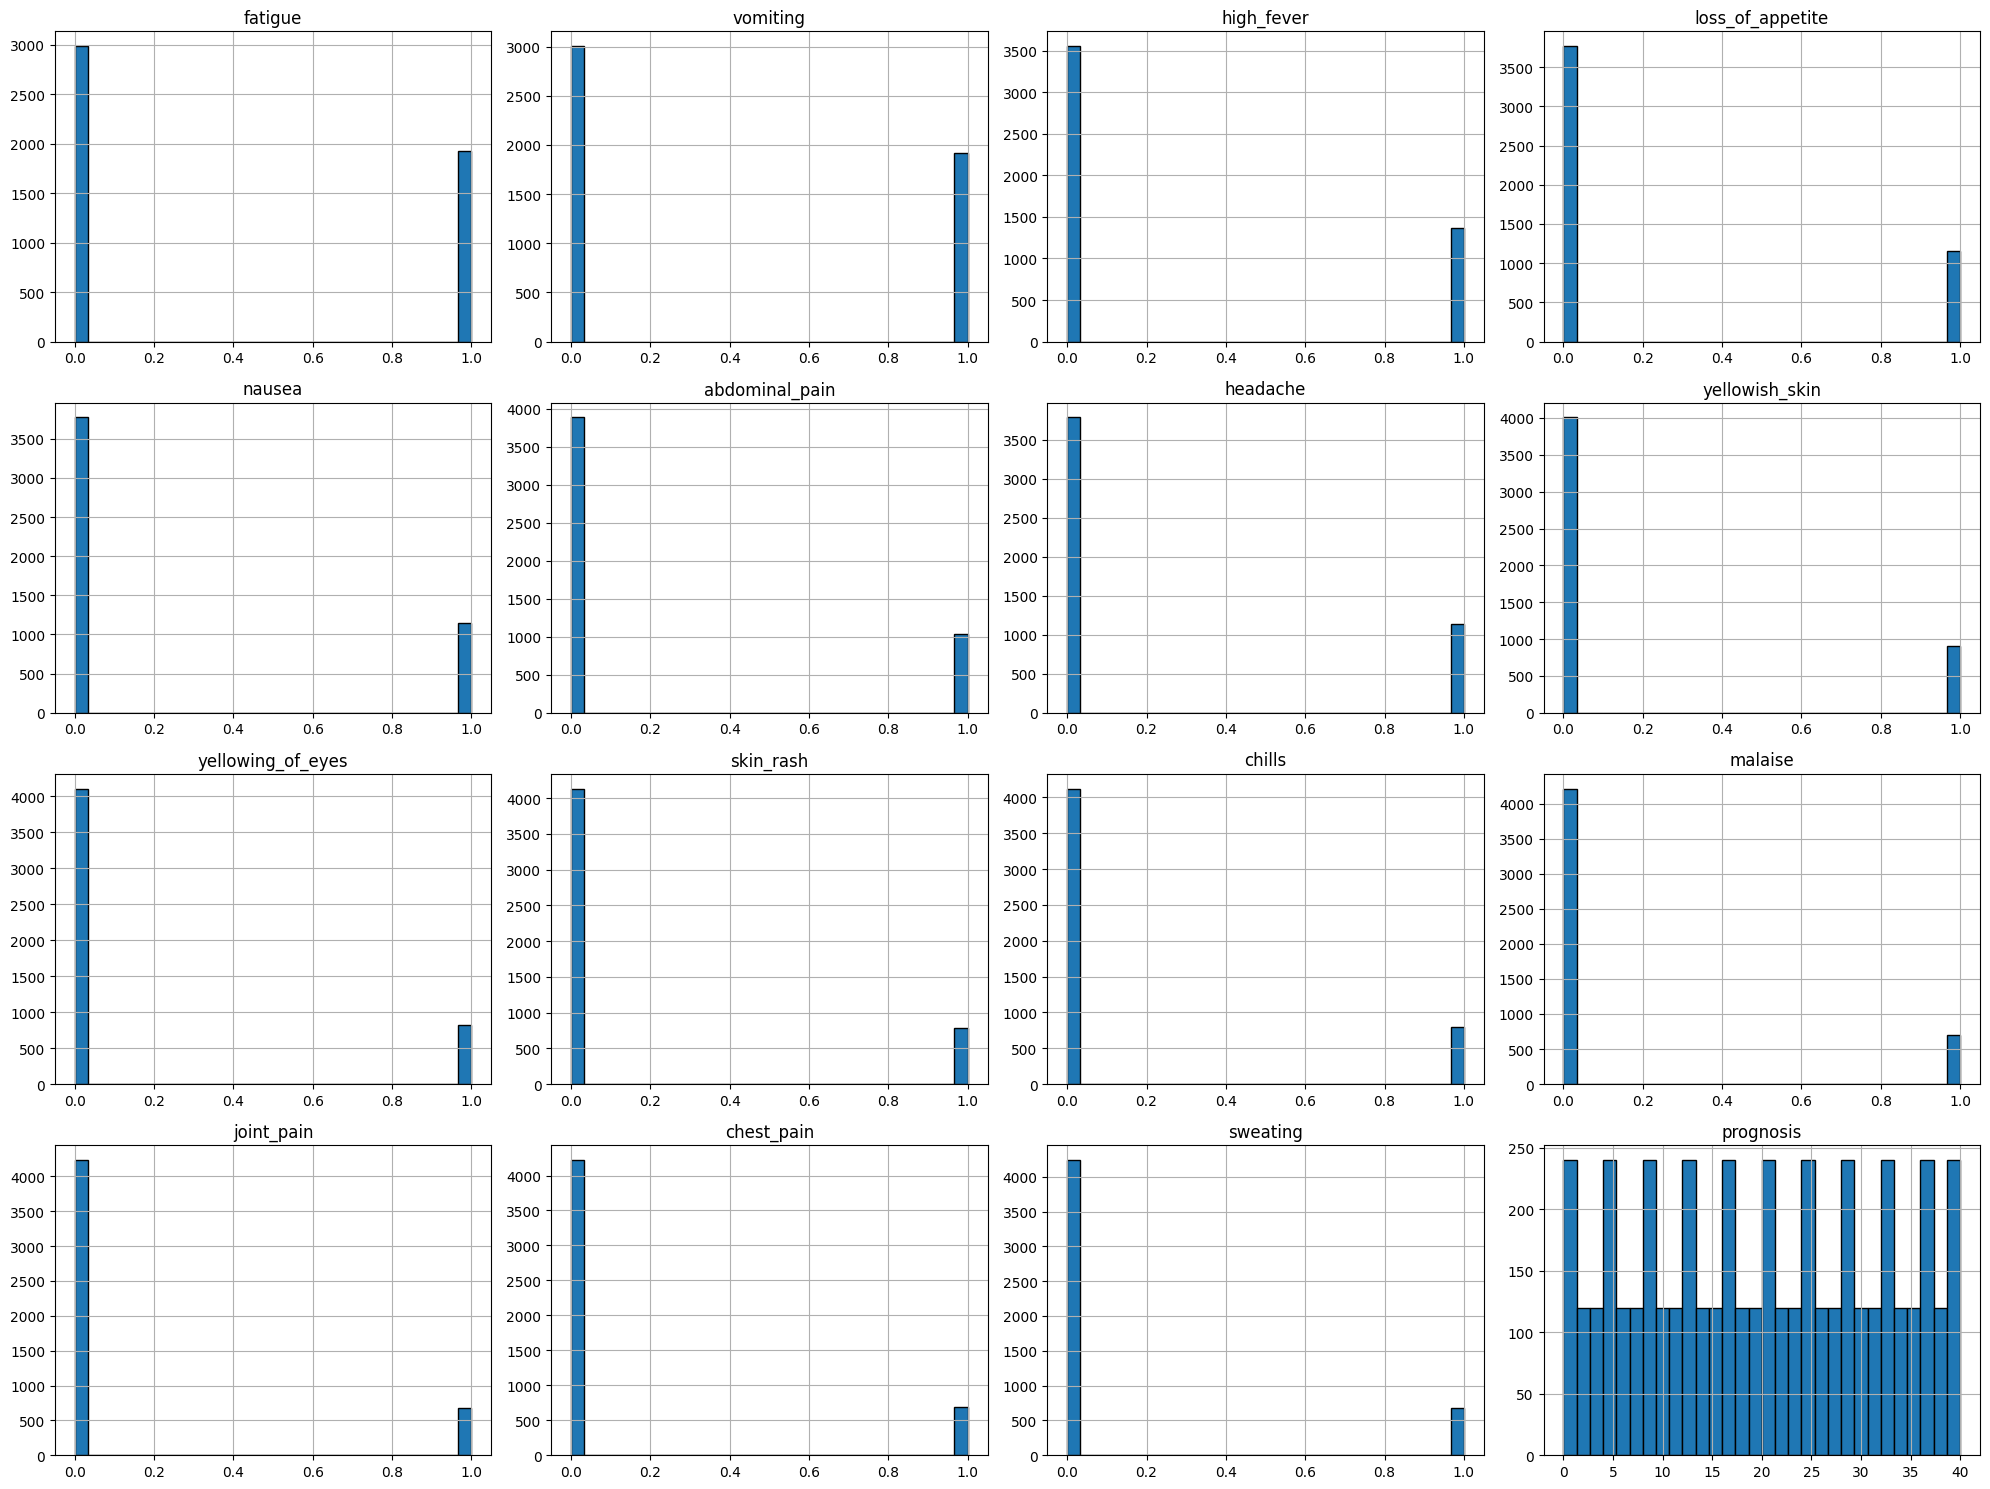

In [ ]:
import matplotlib.pyplot as plt

# Set figure size for better visibility
df_train_selected.hist(figsize=(20, 15), bins=30, edgecolor="black")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


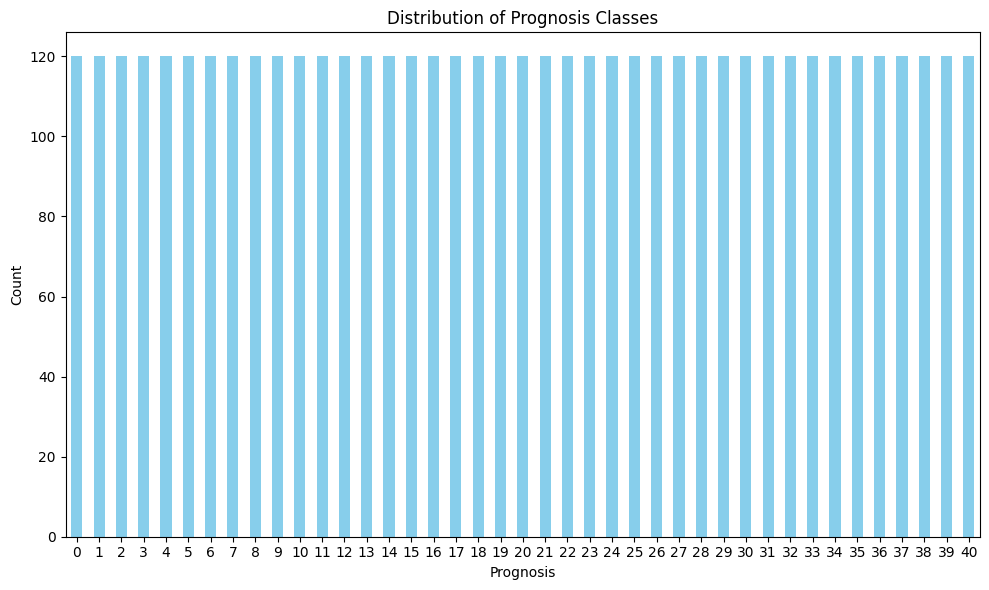

In [ ]:
import matplotlib.pyplot as plt

# Count and sort the classes
class_counts = df_train['prognosis'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Prognosis Classes')
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df_test_selected = df_test[top_15_features['Feature'].tolist() + ["prognosis"]]
df_test_selected.shape

(42, 16)

In [ ]:
x_train_selected = df_train_selected.drop(["prognosis"],axis=1)
y_train_selected = df_train_selected["prognosis"]
x_test_selected = df_test_selected.drop(["prognosis"],axis=1)
y_test_selected = df_test_selected["prognosis"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf.fit(x_train_selected, y_train_selected)

# Step 2: Evaluate on Training Set
y_train_selected_pred = rf.predict(x_train_selected)
train_accuracy = accuracy_score(y_train_selected, y_train_selected_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")

# Predict on the test set
y_test_selected_pred = rf.predict(x_test_selected)

# Compute test accuracy
test_accuracy = accuracy_score(y_test_selected, y_test_selected_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")



Training Accuracy: 0.7854
Test Accuracy: 0.8095


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.8095

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.25      1.00      0.40         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.25      1.00      0.40         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.33      1.00      0.50         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       1.00      1.00 

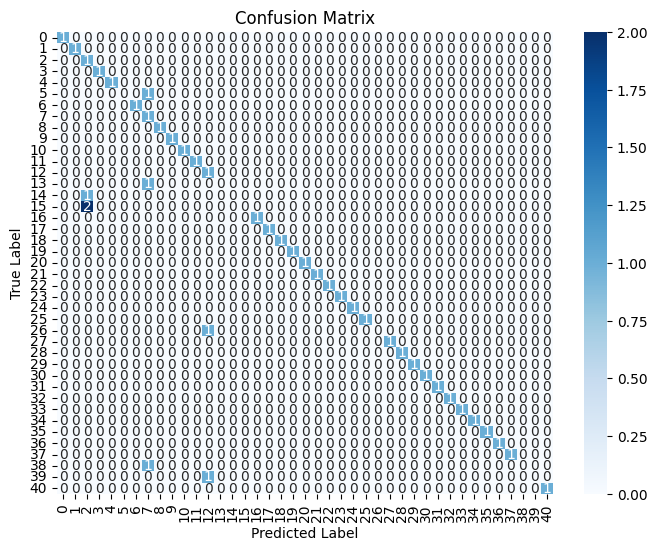

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Compute evaluation metrics
accuracy = accuracy_score(y_test_selected, y_test_selected_pred)
report = classification_report(y_test_selected, y_test_selected_pred)  # Precision, Recall, F1-score
conf_matrix = confusion_matrix(y_test_selected, y_test_selected_pred)

# Print accuracy and classification report
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

# Get feature importances from the model
importances = rf.feature_importances_

# Create a DataFrame for better readability
feature_names = x_train_selected.columns  # Replace with the actual feature set used
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
display(feature_importance_df)


,Feature,Importance
2,high_fever,0.111593
0,fatigue,0.107503
14,sweating,0.083632
12,joint_pain,0.081834
1,vomiting,0.079556
6,headache,0.073144
13,chest_pain,0.061961
4,nausea,0.061760
10,chills,0.060914
9,skin_rash,0.060336


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 30
[LightGBM] [Info] Number of data points in the train set: 4920, number of used features: 15
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[LightGBM] [Info] Start training from score -3.713572
[L

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LightGBM Test Accuracy: 0.8095

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.25      1.00      0.40         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.25      1.00      0.40         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.33      1.00      0.50         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16    

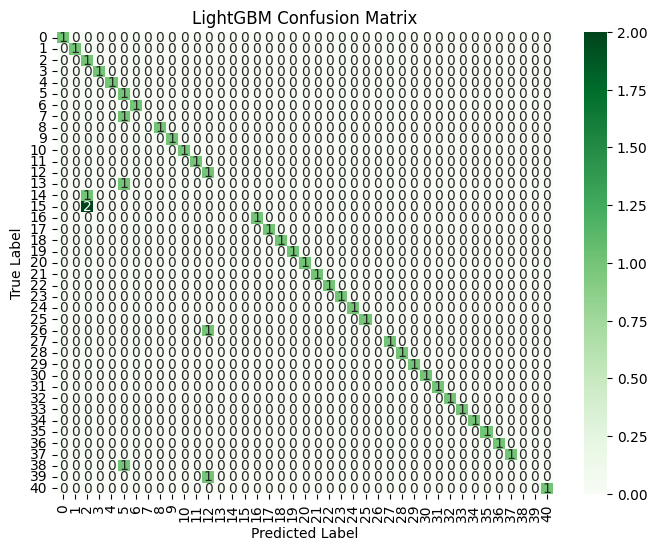

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create and train the LightGBM classifier
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(x_train_selected, y_train_selected)

# Make predictions
y_test_selected_pred_lgbm = lgbm.predict(x_test_selected)

# Evaluation metrics
accuracy_lgbm = accuracy_score(y_test_selected, y_test_selected_pred_lgbm)
report_lgbm = classification_report(y_test_selected, y_test_selected_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test_selected, y_test_selected_pred_lgbm)

# Print results
print(f"LightGBM Test Accuracy: {accuracy_lgbm:.4f}")
print("\nLightGBM Classification Report:\n", report_lgbm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Greens",
            xticklabels=lgbm.classes_, yticklabels=lgbm.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LightGBM Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

# Create DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x_train_selected.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the full table
print(feature_importance_df)


              Feature  Importance
0             fatigue        6423
1          high_fever        5894
2            vomiting        5749
3            headache        5657
4          joint_pain        4490
5              nausea        4457
6           skin_rash        3983
7      abdominal_pain        3799
8          chest_pain        3599
9    loss_of_appetite        3314
10           sweating        3309
11             chills        2750
12     yellowish_skin        2686
13  yellowing_of_eyes        1783
14            malaise        1223
